In [36]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import iqr
with open('test2.txt', 'r') as f:
    data = f.read()
entries = re.split('\n', data)[:-1]
entries_dict = [eval(e) for e in entries]
data = pd.DataFrame(entries_dict)
#data = data.loc[data['step'] < 2560]
data['lb'] = data['mean'] - 1.64 * data['std']/ np.sqrt(data['sample-size'])
data1 = data.loc[data['lr'] == 0.005]
print(data.columns)

Index(['expt', 'lr', 'step', 'seed-data', 'seed-model', 'mean', 'std',
       'sample-size', 'lb'],
      dtype='object')


In [37]:
summary = data1.groupby(['lr', 'expt', 'step']).agg({'lb':['mean', 'std']})
np.unique(data['expt'])
summary

lb           
                           mean        std
lr    expt      step                      
0.005 baseline  10     1.041970   0.005373
                20     1.051612   0.009651
                40     1.071335   0.018844
                80     1.113063   0.039353
                160    1.206093   0.088213
                320    1.433324   0.218369
                640    2.081695   0.631709
                1280   4.322437   2.230925
                2560  12.553306   8.107379
      project   10     1.039995   0.006684
                20     1.045236   0.010249
                40     1.055913   0.020138
                80     1.078510   0.043278
                160    1.129160   0.098707
                320    1.254522   0.247137
                640    1.629652   0.736789
                1280   2.964635   2.668460
                2560   7.777190   9.966004
      reduction 10     1.039231   0.004507
                20     1.052819   0.007160
                40     1.081092   0.014055
                80     1.142608   0.030998
                160    1.287870   0.076425
                320    1.682914   0.219896
                640    2.958989   0.755048
                1280   7.430654   3.055102
                2560  22.032384  11.707331
      sensr     10     1.007488   0.000789
                20     1.007801   0.000870
                40     1.008406   0.001111
                80     1.009595   0.001737
                160    1.011894   0.003123
                320    1.016394   0.006032
                640    1.025087   0.011999
                1280   1.041791   0.024096
                2560   1.073745   0.047958

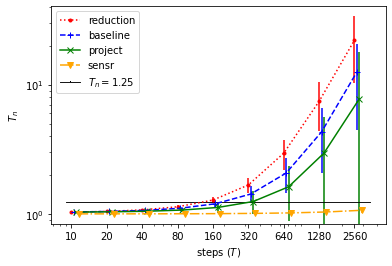

In [39]:
from matplotlib.lines import Line2D
n = np.unique(data['step'])
shift = n/20
lstys = [':', '--', '-', '-.']
markers = ['.', '+', 'x', 'v']
colors = ['red', 'blue', 'green', 'orange']
expts = ['reduction', 'baseline', 'project', 'SenSR']
custom_sublines = []
for i, (lty, mk, c, expt) in enumerate(zip(lstys, markers, colors, expts)):
    summary1 = summary.iloc[summary.index.get_level_values('expt') == expt]['lb']
    mean, std = summary1['mean'], summary1['std']
    custom_sublines.append(Line2D([0], [0], color = c, linestyle=lty, marker = mk))
    plt.errorbar(n + i * shift, mean, std, color = c, ecolor= c, linestyle = lty, marker = mk)


m = [9, 3500]
plt.plot(m, [1.25]*2, 'k-', lw = 0.9)
custom_sublines.append(Line2D([0], [0], color = 'black', linestyle='-', marker = ',', lw = 0.9))
expts.append('$T_n=1.25$')
plt.xscale('log')
plt.yscale('log')    
plt.xticks(n, n)
plt.ylabel('$T_n$')
plt.xlabel('steps ($T$)')
plt.legend(custom_sublines, expts, loc = 'upper left')
plt.savefig('plot.pdf')

In [21]:
np.unique(data['lr'])

array([0.0005, 0.002 , 0.005 ])

In [40]:
data2 = data.loc[data['expt'] == 'project']
data2 = data2.loc[data2['lr'] == 0.005]
data2 = data2.loc[data2['step'] == 640]

In [41]:
data2

,expt,lr,step,seed-data,seed-model,mean,std,sample-size,lb
834,project,0.005,640,98539,77708,2.557399,1.999844,199,2.324904
861,project,0.005,640,5192,98047,3.467195,2.752048,200,3.148052
888,project,0.005,640,50057,73349,1.066305,0.062924,198,1.058971
915,project,0.005,640,21440,98448,1.136275,0.126968,200,1.121551
942,project,0.005,640,20609,49100,1.355618,0.411282,199,1.307804
969,project,0.005,640,7751,43757,1.409296,0.557301,198,1.344343
996,project,0.005,640,31228,36230,1.077214,0.074920,199,1.068504
1023,project,0.005,640,97561,21758,1.413310,0.453998,198,1.360397
1050,project,0.005,640,45413,35730,2.680025,1.974741,198,2.449869
1077,project,0.005,640,51668,64395,1.129486,0.149377,199,1.112120
